In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mask = pd.read_csv('./data/mask_text.csv')
vaccine = pd.read_csv('./data/vaccine_text.csv')

C:\Users\wongc\anaconda3\envs\comp4211\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\wongc\anaconda3\envs\comp4211\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,3,7,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
vaccine.head(50)

,date,user,is_retweet,is_quote,text,quoted_text,lat,long,hts,mentions,tweet_id,likes,retweets,replies,quote_count,original_tweet_id
0,"being of the citizens of the planet"". #CarlSag...",NaN,NaN,NaN,USElections2020;USA;USElection2020;COVID19;cor...,NaN,1.3233829940993188e+18,0.0,0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,2020-11-02 22:00:39,0Blair0,True,True,RT @JackPosobiec: The WHO helped China cover u...,China extracted concessions from the WHO that ...,NaN,NaN,NaN,NaN,1.3233845543678894e+18,0.0,0.0,0.0,0.0,1.323384e+18
2,2020-11-02 20:46:16,0CT0BERSURPRISE,True,False,RT @JoeBiden: This is my commitment to you: We...,NaN,NaN,NaN,NaN,NaN,1.323365833528103e+18,0.0,0.0,0.0,0.0,1.323291e+18
3,2020-11-03 13:26:58,0Gf1lCKkKy0ucqy,True,False,RT @HHShkMohd: While receiving the COVID-19 va...,NaN,NaN,NaN,NaN,NaN,1323617667178205186,0,0.0,0.0,0.0,1.323543e+18
4,2020-11-03 07:44:24,0Selna0,True,True,RT @angie_rasmussen: The most likely scenario ...,This long New York Times story on China’s refu...,NaN,NaN,NaN,NaN,1323531459957719042,0,0.0,0.0,0.0,1.323448e+18
5,2020-11-03 01:56:17,0_0_Sa,False,True,learn from China!,China crushed Covid19 in the Spring of this ye...,NaN,NaN,NaN,NaN,1323443854087843840,0,0.0,0.0,0.0,NaN
6,2020-11-02 20:35:03,0bama_gate,False,True,Your H1N1 Playbook where you stop testing at 6...,"In public, President Trump compared COVID-19 t...",NaN,NaN,NaN,NaN,1.323363010778407e+18,0.0,0.0,0.0,0.0,NaN
7,2020-11-02 23:22:53,0ct100,True,False,RT @Motard8559: El Coronavirus es tan selectiv...,NaN,NaN,NaN,NaN,NaN,1323405247734304769,0.0,0.0,0.0,0.0,1.323299e+18
8,2020-11-03 13:03:14,0dinesh_,True,False,RT @OpIndia_com: China obstructed WHO from inv...,NaN,NaN,NaN,NaN,NaN,1323611694614999043,0,0.0,0.0,0.0,1.323597e+18
9,2020-11-02 22:26:37,0drat,True,True,RT @PippaCrerar: Such a powerful report on BBC...,The effect of coronavirus on Liverpool's hospi...,NaN,NaN,NaN,NaN,1.3233910881162895e+18,0.0,0.0,0.0,0.0,1.323390e+18


In [4]:
user = vaccine['user']
hashtags = vaccine['hts']
nona = hashtags.notna()
truehts = hashtags[nona].reset_index(drop=True)
for i in range(len(truehts)):
    truehts[i] = truehts[i].lower()

In [5]:
htcount = list()
for i in range(len(truehts)):
    for j in range(len(truehts[i].split(';'))):
        htcount.append(truehts[i].split(';')[j])

In [6]:
htfreq = [htcount.count(ht) for ht in htcount]
htdict = dict(list(zip(htcount, htfreq)))
sorted_ht = sorted(htdict.items(), key = lambda k: k[1], reverse=True)

In [7]:
sorted_ht

[('covid19', 5869),
 ('coronavirus', 5677),
 ('covid', 1263),
 ('covid_19', 841),
 ('corona', 678),
 ('vaccine', 492),
 ('china', 429),
 ('coronaviruspandemic', 367),
 ('pandemic', 309),
 ('trump', 265),
 ('electionday', 244),
 ('biden', 241),
 ('virus', 239),
 ('election2020', 234),
 ('vote', 229),
 ('lockdown', 226),
 ('covidー19', 223),
 ('france', 215),
 ('coronavirusupdate', 214),
 ('covidiots', 193),
 ('covid19france', 189),
 ('covid__19', 172),
 ('india', 163),
 ('news', 150),
 ('florida', 148),
 ('texas', 146),
 ('pennsylvania', 144),
 ('staysafe', 140),
 ('taxpayers', 138),
 ('ohio', 135),
 ('maga', 130),
 ('oklahoma', 124),
 ('family', 123),
 ('lockdown2uk', 122),
 ('democrats', 121),
 ('fracking', 121),
 ('ethanol', 121),
 ('jobs', 120),
 ('covid19uk', 119),
 ('chinavirus', 111),
 ('coronavirusuk', 104),
 ('covid2019', 102),
 ('vaccines', 98),
 ('srilanka', 95),
 ('bidenharris2020', 95),
 ('breaking', 93),
 ('lockdown2', 90),
 ('facemask', 88),
 ('who', 86),
 ('health', 84),


In [8]:
ht_list = []
for i in range(200):
    ht_list.append(sorted_ht[i][0])

In [9]:
user_vac = vaccine.groupby(['user'])
ht_set = set(ht_list)

In [23]:
if "maga" in ht_set:
    print('yes')

yes


In [10]:
vaccine.groupby(['user']).mean()

,retweets,replies,quote_count,original_tweet_id
user,,,,
000stand,0.0,0.0,0.0,1.322969e+18
001fatalityrate,0.0,0.0,0.0,NaN
006Kike,0.0,0.0,0.0,1.323291e+18
007Dufour007,0.0,0.0,0.0,1.323325e+18
00mropinionated,0.0,0.0,0.0,NaN
...,...,...,...,...
zyrrish,0.0,0.0,0.0,NaN
zyyyye,0.0,0.0,0.0,1.323435e+18
zzposts,0.0,0.0,0.0,NaN


In [11]:
import re
def extract_ht(text):
    ht_extracted = re.findall(r"#(\w+)", text)
    return [x.lower() for x in ht_extracted]

In [25]:
ht_vectors = []
vector_user_index = {}
name_list = []
vector_ind = 0
for name, group in user_vac:
    # if len(group) < 2:
    #     continue
    
    # vector_user_index[vector_ind] = name
    # vector_ind += 1
    
    user_ht_vector = [0.0]*len(ht_list)
    
    user_tweets = group['text'].tolist()
    extracted_hts = extract_ht(' '.join(user_tweets))
    
    matching_hts = list([x for x in extracted_hts if x in ht_set])
    if len(matching_hts) == 0:
        continue
    name_list.append(name)

    for mht in matching_hts:
        m_index = ht_list.index(mht)
        user_ht_vector[m_index]+=1
        
    ht_vectors.append(user_ht_vector)

In [26]:
len(ht_vectors), len(name_list)

(12834, 12834)

In [55]:
G = nx.Graph()

In [10]:
G.remove_nodes_from(list(nx.isolates(G)))
G.number_of_nodes(), G.number_of_edges()

(687, 8224)

In [62]:
nx.write_gexf(G, "co_hashtag.gexf")

In [16]:
from embedding import Embedding

In [27]:
emb = Embedding(ht_vectors)
emb.dimReduce()
# emb.cluster()
# emb.plot(n2v.graph)
# emb.evaluate_dimReduce(n2v.valid_edges, n2v.false_edges)

In [28]:
emb.cluster()

In [29]:
import seaborn as sns

<AxesSubplot:>

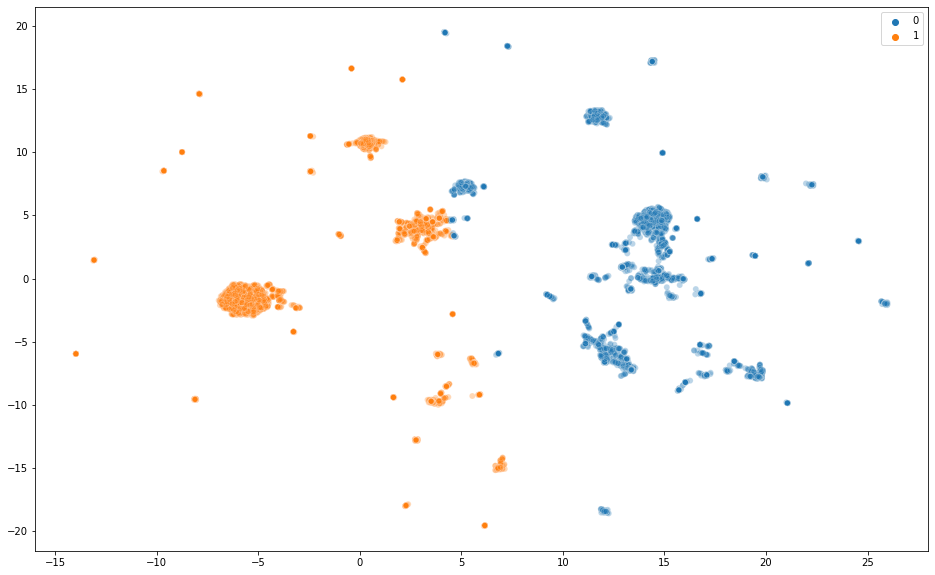

In [30]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=emb.get_nodes_pos()[:,0], y=emb.get_nodes_pos()[:,1],
    hue=emb.get_nodes_cluster(),
    # palette=sns.color_palette("hls", 2),
    # data=df_subset,
    legend="full",
    alpha=0.3)

In [39]:
d = {'node': name_list, 'cluster': emb.get_nodes_cluster(), 'x': emb.get_nodes_pos()[:,0], 'y': emb.get_nodes_pos()[:,1], 'embedding': ht_vectors}
df2 = pd.DataFrame(d)


In [37]:
df2.to_csv("results/pure_accunulated_hashtag_feature.csv", index=False)

In [31]:
d3 = {'node': name_list, 'embedding': ht_vectors}
df3 = pd.DataFrame(d3)


In [34]:
df3.to_csv("embedding_outputs/pure_hashtag.csv", index=False)


# Hashtag labelling

In [ ]:
left = ['voteblue', 'resist', 'resistance']
right = ['maga', 'kag']

# Salience score

In [40]:
df2 

,node,cluster,x,y,embedding
0,000stand,1,0.584182,10.976583,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,00mropinionated,0,17.293419,1.547815,"[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
2,02Rrfj,1,-6.218287,-2.116397,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,04phuxache,1,-2.431406,11.293998,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,0608Zdd,0,19.828636,7.998387,"[2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
...,...,...,...,...,...
12829,zulkiflijalill,0,11.873429,13.282300,"[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
12830,zusolms,0,14.268508,4.239549,"[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
12831,zutetalors,0,11.689485,12.539649,"[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
12832,zyrrish,1,-5.476315,-0.860220,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [50]:
cluster_arr = np.array(df2['cluster'])
cluster_arr

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [41]:
ht_arr = np.array(ht_vectors)

In [59]:
tf_1 = np.matmul(cluster_arr, ht_arr)
tf_1

array([4.33e+03, 9.68e+02, 1.90e+02, 2.60e+01, 1.74e+02, 3.57e+02,
       4.06e+02, 5.20e+01, 9.70e+01, 1.11e+02, 1.47e+02, 3.20e+01,
       1.80e+01, 1.40e+02, 2.10e+02, 5.60e+01, 5.10e+01, 1.50e+01,
       2.70e+01, 5.70e+01, 3.00e+00, 5.00e+01, 4.50e+01, 3.80e+01,
       1.50e+01, 1.50e+01, 2.20e+01, 2.80e+01, 1.00e+00, 1.00e+01,
       4.60e+01, 2.00e+00, 1.00e+00, 4.70e+01, 9.00e+00, 0.00e+00,
       0.00e+00, 2.00e+00, 4.60e+01, 1.33e+02, 4.40e+01, 2.90e+01,
       1.52e+02, 7.00e+00, 1.17e+02, 2.30e+01, 3.20e+01, 1.10e+01,
       8.70e+01, 3.90e+01, 8.00e+00, 5.00e+00, 2.50e+01, 3.90e+01,
       9.00e+00, 6.50e+01, 5.00e+00, 8.10e+01, 2.00e+00, 8.00e+00,
       3.50e+01, 7.30e+01, 1.80e+01, 4.00e+01, 5.00e+00, 7.30e+01,
       8.40e+01, 3.60e+01, 7.00e+00, 3.30e+01, 6.00e+00, 0.00e+00,
       5.40e+01, 4.20e+01, 6.00e+00, 5.30e+01, 6.00e+00, 4.90e+01,
       1.80e+01, 1.90e+01, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
       3.00e+01, 0.00e+00, 0.00e+00, 1.70e+01, 1.00e+01, 0.00e

In [56]:
total_1 = np.sum(tf_1)
total_1

11286.0

In [62]:
cluster_invert = (cluster_arr == 0) 

In [65]:
cluster_invert = cluster_invert + 0

In [66]:
tf_0_new = np.matmul(cluster_invert, ht_arr)
tf_0_new

array([8.873e+03, 9.350e+03, 2.842e+03, 1.269e+03, 1.126e+03, 3.980e+02,
       5.250e+02, 5.930e+02, 8.160e+02, 5.480e+02, 5.000e+02, 4.910e+02,
       4.590e+02, 4.610e+02, 2.780e+02, 4.900e+02, 3.140e+02, 2.260e+02,
       2.160e+02, 2.640e+02, 1.960e+02, 2.060e+02, 2.480e+02, 2.510e+02,
       1.760e+02, 1.650e+02, 1.740e+02, 3.940e+02, 1.370e+02, 1.460e+02,
       4.060e+02, 1.400e+02, 1.330e+02, 2.390e+02, 1.660e+02, 1.250e+02,
       1.220e+02, 1.340e+02, 2.200e+02, 6.500e+01, 1.540e+02, 1.330e+02,
       7.500e+01, 1.420e+02, 1.090e+02, 1.160e+02, 2.050e+02, 9.100e+01,
       1.490e+02, 1.810e+02, 8.000e+01, 1.250e+02, 2.340e+02, 2.760e+02,
       7.900e+01, 9.300e+01, 9.700e+01, 4.000e+01, 7.400e+01, 7.400e+01,
       7.000e+01, 2.430e+02, 2.540e+02, 4.200e+01, 1.020e+02, 4.000e+00,
       1.500e+01, 1.230e+02, 1.120e+02, 1.130e+02, 9.100e+01, 2.370e+02,
       2.000e+00, 1.020e+02, 1.040e+02, 0.000e+00, 1.110e+02, 5.000e+00,
       4.300e+01, 1.210e+02, 5.100e+01, 5.100e+01, 

In [43]:
ht_sum = np.sum(ht_arr, axis=0)

In [61]:
tf_0 = ht_sum - tf_1
tf_0

array([8.873e+03, 9.350e+03, 2.842e+03, 1.269e+03, 1.126e+03, 3.980e+02,
       5.250e+02, 5.930e+02, 8.160e+02, 5.480e+02, 5.000e+02, 4.910e+02,
       4.590e+02, 4.610e+02, 2.780e+02, 4.900e+02, 3.140e+02, 2.260e+02,
       2.160e+02, 2.640e+02, 1.960e+02, 2.060e+02, 2.480e+02, 2.510e+02,
       1.760e+02, 1.650e+02, 1.740e+02, 3.940e+02, 1.370e+02, 1.460e+02,
       4.060e+02, 1.400e+02, 1.330e+02, 2.390e+02, 1.660e+02, 1.250e+02,
       1.220e+02, 1.340e+02, 2.200e+02, 6.500e+01, 1.540e+02, 1.330e+02,
       7.500e+01, 1.420e+02, 1.090e+02, 1.160e+02, 2.050e+02, 9.100e+01,
       1.490e+02, 1.810e+02, 8.000e+01, 1.250e+02, 2.340e+02, 2.760e+02,
       7.900e+01, 9.300e+01, 9.700e+01, 4.000e+01, 7.400e+01, 7.400e+01,
       7.000e+01, 2.430e+02, 2.540e+02, 4.200e+01, 1.020e+02, 4.000e+00,
       1.500e+01, 1.230e+02, 1.120e+02, 1.130e+02, 9.100e+01, 2.370e+02,
       2.000e+00, 1.020e+02, 1.040e+02, 0.000e+00, 1.110e+02, 5.000e+00,
       4.300e+01, 1.210e+02, 5.100e+01, 5.100e+01, 

In [71]:
tf_0[199]

0.0

In [67]:
total_0 = np.sum(tf_0)

In [69]:
valence_score_1 = 2* tf_1/ total_1 / (tf_1/total_1 + tf_0/total_0) - 1

In [70]:
valence_score_1

array([ 0.30719801, -0.42827196, -0.58920565, -0.85319286, -0.25196935,
        0.55238914,  0.49875585, -0.49359643, -0.37022213, -0.12159667,
        0.06399586, -0.59745683, -0.73667441,  0.08012128,  0.4898891 ,
       -0.38707559, -0.22850589, -0.59156568, -0.34833676, -0.09003326,
       -0.88825195, -0.03174471, -0.17537988, -0.26154133, -0.5042923 ,
       -0.47984003, -0.34330582, -0.56890476, -0.94510444, -0.58124413,
       -0.39074984, -0.89531186, -0.94350009, -0.13613629, -0.6534009 ,
       -1.        , -1.        , -0.89088008, -0.10592305,  0.77556827,
        0.04974861, -0.08514877,  0.7736545 , -0.67982428,  0.6116693 ,
       -0.13210024, -0.24723519, -0.36297745,  0.38605189, -0.09104368,
       -0.44232797, -0.73211331, -0.41534344, -0.29336887, -0.38842211,
        0.45980587, -0.66763575,  0.77348931, -0.81077536, -0.41044027,
        0.31815916,  0.07473061, -0.56985633,  0.57286442, -0.68133219,
        0.97205264,  0.91170852,  0.06175979, -0.61075406,  0.06

In [72]:
valence_score_0 = 2* tf_0/ total_0 / (tf_1/total_1 + tf_0/total_0) - 1

In [74]:
valence_score_0

array([-0.30719801,  0.42827196,  0.58920565,  0.85319286,  0.25196935,
       -0.55238914, -0.49875585,  0.49359643,  0.37022213,  0.12159667,
       -0.06399586,  0.59745683,  0.73667441, -0.08012128, -0.4898891 ,
        0.38707559,  0.22850589,  0.59156568,  0.34833676,  0.09003326,
        0.88825195,  0.03174471,  0.17537988,  0.26154133,  0.5042923 ,
        0.47984003,  0.34330582,  0.56890476,  0.94510444,  0.58124413,
        0.39074984,  0.89531186,  0.94350009,  0.13613629,  0.6534009 ,
        1.        ,  1.        ,  0.89088008,  0.10592305, -0.77556827,
       -0.04974861,  0.08514877, -0.7736545 ,  0.67982428, -0.6116693 ,
        0.13210024,  0.24723519,  0.36297745, -0.38605189,  0.09104368,
        0.44232797,  0.73211331,  0.41534344,  0.29336887,  0.38842211,
       -0.45980587,  0.66763575, -0.77348931,  0.81077536,  0.41044027,
       -0.31815916, -0.07473061,  0.56985633, -0.57286442,  0.68133219,
       -0.97205264, -0.91170852, -0.06175979,  0.61075406, -0.06

In [99]:
ht_cluster_0 = []
for i, ht in enumerate(valence_score_0):
    if ht >= 0.7:
        ht_cluster_0.append((ht_list[i], tf_0[i]*ht))
print(ht_cluster_0)

[('covid_19', 1082.701737056057), ('virus', 338.13355459674744), ('covid19france', 174.09738165326274), ('taxpayers', 129.47930865085902), ('oklahoma', 125.34366052225316), ('family', 125.48551183906001), ('fracking', 125.0), ('ethanol', 122.0), ('jobs', 119.3779312052153), ('lka', 91.51416416247426), ('pray', 59.99737651744616), ('coronawillendsoon', 237.0), ('evidence', 51.0), ('beltandroad', 43.812001492192636), ('djibouti', 52.0), ('chinaindiafaceoff', 51.0), ('astrology', 48.0), ('astronomia', 48.0), ('astronomy', 47.0), ('cats', 31.802084873576813), ('dogs', 30.845924865292584), ('fittedmask', 38.0), ('cheerup', 38.0), ('saveyourlife', 38.0), ('rugdoll', 38.0), ('mascot', 38.0), ('amyconeybarrett', 28.036336735461546), ('soberana02', 35.0), ('2019ncov', 83.0), ('definitelynot', 27.05665233842115), ('comehelp', 35.0), ('republicans', 37.57039495519415), ('instagram', 66.88194200351496), ('plandemic2020', 28.0), ('lockdownsarenotacure', 58.03408062978266), ('vitaminc', 28.0), ('2nd

In [100]:
ht_cluster_1 = []
for i, ht in enumerate(valence_score_1):
    if ht >= 0.7:
        ht_cluster_1.append((ht_list[i], tf_1[i]*ht))
print(ht_cluster_1)

[('chinavirus', 103.15058026151732), ('vaccines', 117.59548426759068), ('plandemic', 62.652633931897775), ('votetrump', 70.9598426939512), ('ccp', 76.58351548112833), ('blair', 52.97528089887639), ('campbell', 53.0), ('superspreaderrallies', 46.480164199826575), ('ccpchina', 53.48519819367787), ('votebidenharristosaveamerica', 43.87989351023437), ('faucithefraud', 23.871702472973347), ('endlockdownnow', 30.56218499225679), ('thechinavirus', 35.979728685556104), ('justthenews', 39.0), ('365sportsentertainment', 49.0), ('chinaliedpeopledied', 71.46451793664517), ('ecuador', 28.98300044605244), ('billgatesevil', 31.483845688825202), ('covid19bc', 21.020174848688637), ('chinese', 20.741128504090987), ('covid19ke', 51.47058768381233), ('flushot', 24.515643544171073), ('deepstateswamp', 27.0), ('covir', 26.524069466519105), ('icaiexams', 30.98192192005954), ('h1n1', 22.540865730310145), ('covidvaccine', 25.079938735649947), ('qarmyjapan', 22.0), ('qajf', 22.0)]


In [101]:
sorted_valence_0 = sorted(ht_cluster_0, key=lambda tup: tup[1], reverse = True)
sorted_valence_1 = sorted(ht_cluster_1, key=lambda tup: tup[1], reverse = True)

In [102]:
sorted_valence_0, sorted_valence_1

([('covid_19', 1082.701737056057),
  ('virus', 338.13355459674744),
  ('coronawillendsoon', 237.0),
  ('covid19france', 174.09738165326274),
  ('taxpayers', 129.47930865085902),
  ('family', 125.48551183906001),
  ('oklahoma', 125.34366052225316),
  ('fracking', 125.0),
  ('ethanol', 122.0),
  ('jobs', 119.3779312052153),
  ('lka', 91.51416416247426),
  ('2019ncov', 83.0),
  ('instagram', 66.88194200351496),
  ('follow', 62.645720644144276),
  ('pray', 59.99737651744616),
  ('moronavirus', 59.0),
  ('lockdownsarenotacure', 58.03408062978266),
  ('djibouti', 52.0),
  ('evidence', 51.0),
  ('chinaindiafaceoff', 51.0),
  ('astrology', 48.0),
  ('astronomia', 48.0),
  ('astronomy', 47.0),
  ('beltandroad', 43.812001492192636),
  ('mewgulf', 40.843521563468954),
  ('fittedmask', 38.0),
  ('cheerup', 38.0),
  ('saveyourlife', 38.0),
  ('rugdoll', 38.0),
  ('mascot', 38.0),
  ('republicans', 37.57039495519415),
  ('2ndwave', 36.0),
  ('soberana02', 35.0),
  ('comehelp', 35.0),
  ('cats', 31.8

In [95]:
ht_cluster_0 = []
for i, ht in enumerate(valence_score_0):
    if ht >= 0.8:
        ht_cluster_0.append((ht_list[i], ht))
print(ht_cluster_0)

[('covid_19', 0.8531928582002026), ('covid19france', 0.8882519472105241), ('taxpayers', 0.9451044427070001), ('oklahoma', 0.8953118608732369), ('family', 0.9435000890154888), ('fracking', 1.0), ('ethanol', 1.0), ('jobs', 0.8908800836210098), ('pray', 0.810775358343867), ('coronawillendsoon', 1.0), ('evidence', 1.0), ('beltandroad', 0.8590588527880909), ('djibouti', 1.0), ('chinaindiafaceoff', 1.0), ('astrology', 1.0), ('astronomia', 1.0), ('astronomy', 1.0), ('fittedmask', 1.0), ('cheerup', 1.0), ('saveyourlife', 1.0), ('rugdoll', 1.0), ('mascot', 1.0), ('amyconeybarrett', 0.8010381924417584), ('soberana02', 1.0), ('2019ncov', 1.0), ('comehelp', 1.0), ('instagram', 0.8257029876977156), ('plandemic2020', 1.0), ('lockdownsarenotacure', 0.8060288976358703), ('vitaminc', 1.0), ('2ndwave', 1.0), ('mewgulf', 0.8509066992389365), ('moronavirus', 1.0)]


In [96]:
ht_cluster_1 = []
for i, ht in enumerate(valence_score_1):
    if ht >= 0.8:
        ht_cluster_1.append((ht_list[i], ht))
print(ht_cluster_1)

[('votetrump', 0.9720526396431672), ('ccp', 0.9117085176324802), ('blair', 0.9810237203495629), ('campbell', 1.0), ('superspreaderrallies', 0.9485747795882975), ('ccpchina', 0.9904666332162568), ('endlockdownnow', 0.8988877938899056), ('thechinavirus', 0.9724250996096244), ('justthenews', 1.0), ('365sportsentertainment', 1.0), ('chinaliedpeopledied', 0.9789659991321256), ('ecuador', 0.9661000148684147), ('billgatesevil', 0.9540559299644), ('chinese', 0.8296451401636395), ('covid19ke', 0.9711431638455157), ('deepstateswamp', 1.0), ('covir', 0.9146230850523829), ('icaiexams', 0.9681850600018607), ('h1n1', 0.9016346292124058), ('qarmyjapan', 1.0), ('qajf', 1.0)]


In [97]:
sorted_valence_0 = sorted(ht_cluster_0, key=lambda tup: tup[1], reverse = True)
sorted_valence_1 = sorted(ht_cluster_1, key=lambda tup: tup[1], reverse = True)

In [98]:
sorted_valence_0, sorted_valence_1

([('fracking', 1.0),
  ('ethanol', 1.0),
  ('coronawillendsoon', 1.0),
  ('evidence', 1.0),
  ('djibouti', 1.0),
  ('chinaindiafaceoff', 1.0),
  ('astrology', 1.0),
  ('astronomia', 1.0),
  ('astronomy', 1.0),
  ('fittedmask', 1.0),
  ('cheerup', 1.0),
  ('saveyourlife', 1.0),
  ('rugdoll', 1.0),
  ('mascot', 1.0),
  ('soberana02', 1.0),
  ('2019ncov', 1.0),
  ('comehelp', 1.0),
  ('plandemic2020', 1.0),
  ('vitaminc', 1.0),
  ('2ndwave', 1.0),
  ('moronavirus', 1.0),
  ('taxpayers', 0.9451044427070001),
  ('family', 0.9435000890154888),
  ('oklahoma', 0.8953118608732369),
  ('jobs', 0.8908800836210098),
  ('covid19france', 0.8882519472105241),
  ('beltandroad', 0.8590588527880909),
  ('covid_19', 0.8531928582002026),
  ('mewgulf', 0.8509066992389365),
  ('instagram', 0.8257029876977156),
  ('pray', 0.810775358343867),
  ('lockdownsarenotacure', 0.8060288976358703),
  ('amyconeybarrett', 0.8010381924417584)],
 [('campbell', 1.0),
  ('justthenews', 1.0),
  ('365sportsentertainment', 1.0